In [2]:
import geopandas as gpd

In [3]:
import geopandas
import matplotlib.pyplot as plt
import descartes

In [4]:
# Customize Colormaps
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

def colormap():
    # colors
    cdict = ['#01437D','#EB7E21', '#9FACB4', '#FBDA11', '#669FD6']#, '#D7D9D6']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')
my_cmap = colormap()

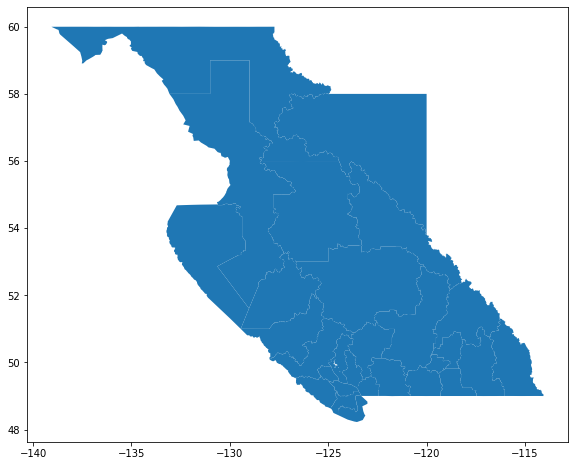

In [5]:
# plt.figure(figsize = (24,8))
BC = geopandas.read_file('json_files\Regional_Districts.geojson')
BC.plot(figsize = (24,8))
plt.show()

In [6]:
region_map = {
    'Regional District of Bulkley-Nechako':'51',
    'Cariboo Regional District':'41',
    'Regional District of Fraser-Fort George':'53',
    'Regional District of Kitimat-Stikine':'49',
    'Peace River Regional District':'55',
    'North Coast Regional District':'59',
    'Regional District of Central Okanagan':'35',
    'Fraser Valley Regional District':'09',
    'Metro Vancouver Regional District':'15',
    'Regional District of Okanagan-Similkameen':'07',
    'Squamish-Lillooet Regional District':'31',
    'Thompson-Nicola Regional District':'33',
    'Regional District of Central Kootenay':'03',
    'Columbia-Shuswap Regional District':'39',
    'Regional District of East Kootenay':'01',
    'Regional District of Kootenay Boundary':'05',
    'Regional District of North Okanagan':'37',
    'Regional District of Alberni-Clayoquot':'23',
    'Capital Regional District':'17',
    'Central Coast Regional District':'45',
    'Comox Valley Regional District':'25',
    'Cowichan Valley Regional District':'19',
    'Regional District of Mount Waddington':'43',
    'Regional District of Nanaimo':'21',
    'qathet Regional District':'27',
    'Sunshine Coast Regional District':'29',
    'Strathcona Regional District':'25',
    'Stikine Region (Unincorporated)':'57'
}

BC['region_id']= BC['ADMIN_AREA_NAME'].apply(lambda x: 'RD' + region_map[x])

### import increase rate data

In [7]:
import pandas as pd
inc_rate = pd.read_csv('inc_rate.csv')

In [8]:
inc_rate_2010 = inc_rate[inc_rate['year'] == 2010]
inc_rate_2010

,year,region_code,small business,large business
80,2010,DR01,0.570420,-0.059184
81,2010,DR02,0.535247,-0.018434
82,2010,DR03,0.472579,-0.018592
83,2010,DR04,0.601334,0.019048
84,2010,DR05,0.395293,0.000000
85,2010,DR06,0.539421,0.046512
86,2010,DR07,0.393506,-0.072464
87,2010,DR08,0.287017,-0.021429


In [133]:
r_code = pd.read_csv('region_codes.csv')
r_code.iloc[0:8,]


# mapping regional districts (RD) to development regions (DR)

import re

RD2DR = dict()
for i in range(8):
    RDs = ['RD' + x.replace('RD','').strip() for x in r_code.iloc[i, 2].replace('+',',').split(",")]
#     print(RDs)
    for x in RDs:
        if x not in RD2DR.keys():
            RD2DR[x] = r_code.iloc[i, 0]
RD2DR

{'RD17': 'DR01',
 'RD19': 'DR01',
 'RD21': 'DR01',
 'RD23': 'DR01',
 'RD25': 'DR01',
 'RD43': 'DR01',
 'RD45': 'DR01',
 'RD09': 'DR02',
 'RD15': 'DR02',
 'RD29': 'DR02',
 'RD31': 'DR02',
 'RD07': 'DR03',
 'RD33': 'DR03',
 'RD35': 'DR03',
 'RD37': 'DR03',
 'RD39': 'DR03',
 'RD01': 'DR04',
 'RD03': 'DR04',
 'RD05': 'DR04',
 'RD41': 'DR05',
 'RD53': 'DR05',
 'RD47': 'DR06',
 'RD49': 'DR06',
 'RD51': 'DR07',
 'RD57': 'DR07',
 'RD55': 'DR08',
 'RD59': 'DR08'}

In [10]:
RD2DR['RD27'] = None
BC['DR_id'] = BC.region_id.apply(lambda x: RD2DR[x])

In [11]:
bc = BC[['ADMIN_AREA_NAME', 'geometry', 'DR_id']]

In [20]:
temp = pd.merge(bc, inc_rate_2010, left_on = 'DR_id', right_on = 'region_code')
temp['small business'] = temp['small business'].apply(lambda x: 100*x)


### Import Business Size data (Goods-Services partition)

In [134]:
types = pd.read_csv('business.csv')
GS = types.groupby(['year', 'region_code', 'sector_type']).sum().loc[2010,:].unstack(-1)['small business']
GS.columns = list(GS.columns)
GS.reset_index(inplace = True)
GS

,region_code,Goods-Producing Sector,Services-Producing Sector
0,DR01,94174.0,22191.0
1,DR02,357271.0,60958.0
2,DR03,63048.0,20434.0
3,DR04,18061.0,5706.0
4,DR05,15530.0,5811.0
5,DR06,4783.0,1758.0
6,DR07,3703.0,2434.0
7,DR08,7196.0,4373.0


Text(0.0, 1, 'The Growth Rate of Small Business Size in 2010')

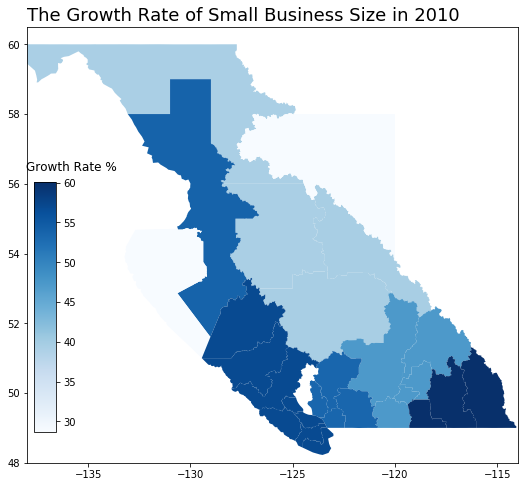

In [135]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes


from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize = (15,10))

divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="3%", pad="2%") # depends on the user needs

axins1 = inset_axes(ax,
                    width="5%",  # width = 50% of parent_bbox width
                    height="50%",  # height : 5%
                    loc='lower left',\
                    bbox_to_anchor=(310, 170, 450, 500)
                   )

temp.plot(column='small business', ax=ax, cax=axins1, \
          cmap = 'Blues', \
          legend=True,\
          legend_kwds={'orientation': "vertical"},\
          )

plt.text(18, 61.5, 'Growth Rate %', fontsize = 12)
ax.set_ylim([48, 60.5])
ax.set_xlim([-138, -114])
# ax.set_axis_off()

ax.set_title('The Growth Rate of Small Business Size in 2010', fontdict={'fontsize': 18}, loc='left')
# plt.annotate('the description of this graph', xy=(0.1, 0.1), size=12, xycoords='figure fraction')


In [136]:
cord = {
    'DR01':[-127, 51],
    'DR02':[-123, 49.5],
    'DR03':[-119, 51],
    'DR04':[-117, 49.5],
    'DR05':[-122,53],
    'DR06':[-128.5, 55],
    'DR07':[-128,59],
    'DR08':[-122, 56.5],  
}

In [137]:
GS['long'] = GS.region_code.apply(lambda x: cord[x][0])
GS['lat'] = GS.region_code.apply(lambda x: cord[x][1])

GS['total'] = GS['Goods-Producing Sector'] + GS['Services-Producing Sector']

GS['Goods-Producing Sector %'] = GS['Goods-Producing Sector']/GS['total']
GS['Services-Producing Sector %'] = GS['Services-Producing Sector']/GS['total']
GS

,region_code,Goods-Producing Sector,Services-Producing Sector,long,lat,total,Goods-Producing Sector %,Services-Producing Sector %
0,DR01,94174.0,22191.0,-127.0,51.0,116365.0,0.809298,0.190702
1,DR02,357271.0,60958.0,-123.0,49.5,418229.0,0.854247,0.145753
2,DR03,63048.0,20434.0,-119.0,51.0,83482.0,0.755229,0.244771
3,DR04,18061.0,5706.0,-117.0,49.5,23767.0,0.759919,0.240081
4,DR05,15530.0,5811.0,-122.0,53.0,21341.0,0.727707,0.272293
5,DR06,4783.0,1758.0,-128.5,55.0,6541.0,0.731234,0.268766
6,DR07,3703.0,2434.0,-128.0,59.0,6137.0,0.603389,0.396611
7,DR08,7196.0,4373.0,-122.0,56.5,11569.0,0.622007,0.377993


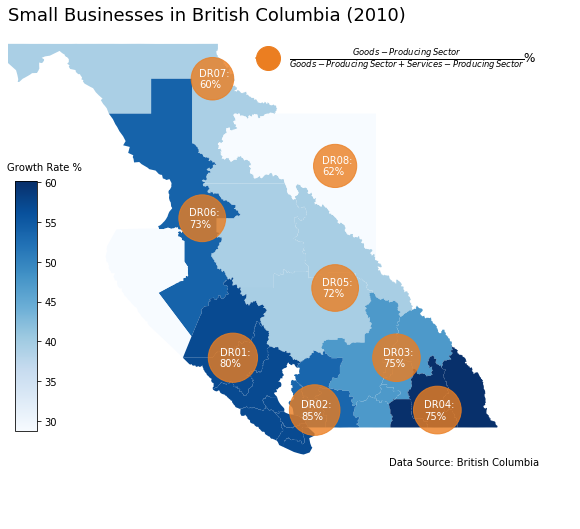

In [142]:
# add industry composition data


from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='#EB7E21',\
                          label=r"$\frac{Goods-Producing\,Sector}{Goods-Producing\,Sector + Services-Producing\,Sector}$%",\
                          #label='Goods-Producing Sector %',\
#                           FontSize = 10,\
                          markerfacecolor='#EB7E21', markersize=24)]

fig, ax = plt.subplots(1, 1, figsize = (15,10))

divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="3%", pad="2%") # depends on the user needs

axins1 = inset_axes(ax,
                    width="5%",  # width = 50% of parent_bbox width
                    height="50%",  # height : 5%
                    loc='lower left',\
                    bbox_to_anchor=(310, 170, 450, 500)
                   )

temp.plot(column='small business', ax=ax, cax=axins1, \
          cmap = 'Blues', \
          legend=True,\
          legend_kwds={'orientation': "vertical"},\
          )

sc = ax.scatter(GS.long, GS.lat,\
            c = '#EB7E21',
            s = GS['Goods-Producing Sector %']*3000, edgecolors= None, alpha = 0.8)

for i in GS.index:
    ax.text(GS.long[i]-0.65, GS.lat[i]-0.25, \
            GS.loc[i,'region_code'] + ': \n' + str(int(GS.loc[i,'Goods-Producing Sector %']*100))+'%', \
            c = 'White')

plt.text(18, 61.5, 'Growth Rate %', fontsize = 10)
ax.set_ylim([48, 60.5])
ax.set_xlim([-138, -114])
ax.set_axis_off()

ax.set_title('Small Businesses in British Columbia (2010)', fontdict={'fontsize': 18}, loc='left')
plt.annotate('Data Source: British Columbia', xy=(0.67, 0.12), size=10, xycoords='figure fraction')

ax.legend(handles=legend_elements, loc='upper right',\
#           'latex',\
          fontsize = 12,\
          bbox_to_anchor=(1.1, 0.98),\
          frameon=False)
plt.show()

### Import Business Size data (Clusters partition)

In [112]:
clusters = pd.read_csv('cluster_b_size.csv').groupby(['year','region_code','cluster_type']\
                                                    ).sum().unstack(-1).loc[2010, 'small business'][['cluster1','cluster2']]
clusters.columns = list(clusters.columns)
clusters.reset_index(inplace = True)
clusters

,region_code,cluster1,cluster2
0,DR01,95974.0,20391.0
1,DR02,331455.0,86774.0
2,DR03,67646.0,15836.0
3,DR04,18989.0,4778.0
4,DR05,16680.0,4661.0
5,DR06,5186.0,1355.0
6,DR07,4733.0,1404.0
7,DR08,8374.0,3195.0


In [116]:
clusters['total'] = clusters.cluster1 + clusters.cluster2
clusters['cluster1 %'] = clusters.cluster1 / clusters.total
clusters['cluster2 %'] = clusters.cluster2 / clusters.total

clusters['long'] = clusters.region_code.apply(lambda x: cord[x][0])
clusters['lat'] = clusters.region_code.apply(lambda x: cord[x][1])

In [117]:
clusters

,region_code,cluster1,cluster2,total,cluster1 %,cluster2 %,long,lat
0,DR01,95974.0,20391.0,116365.0,0.824767,0.175233,-127.0,51.0
1,DR02,331455.0,86774.0,418229.0,0.792520,0.207480,-123.0,49.5
2,DR03,67646.0,15836.0,83482.0,0.810306,0.189694,-119.0,51.0
3,DR04,18989.0,4778.0,23767.0,0.798965,0.201035,-117.0,49.5
4,DR05,16680.0,4661.0,21341.0,0.781594,0.218406,-122.0,53.0
5,DR06,5186.0,1355.0,6541.0,0.792845,0.207155,-128.5,55.0
6,DR07,4733.0,1404.0,6137.0,0.771224,0.228776,-128.0,59.0
7,DR08,8374.0,3195.0,11569.0,0.723831,0.276169,-122.0,56.5


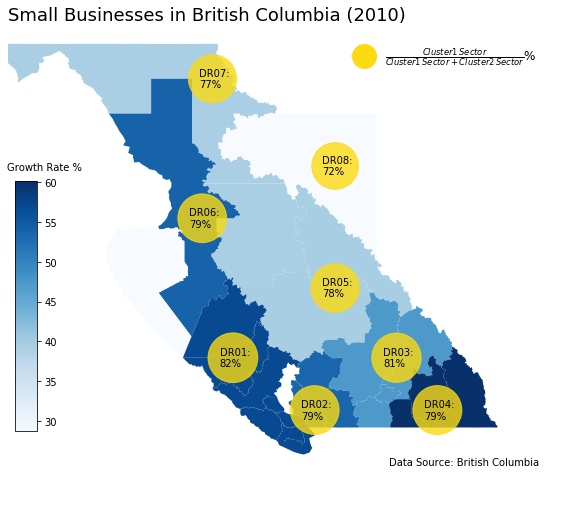

<Figure size 432x288 with 0 Axes>

In [125]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='#FBDA11',\
                          label=r"$\frac{Cluster1\,Sector}{Cluster1\,Sector + Cluster2\,Sector}$%",\
                          #label='Goods-Producing Sector %',\
#                           FontSize = 10,\
                          markerfacecolor='#FBDA11', markersize=24)]

fig, ax = plt.subplots(1, 1, figsize = (15,10))

divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="3%", pad="2%") # depends on the user needs

axins1 = inset_axes(ax,
                    width="5%",  # width = 50% of parent_bbox width
                    height="50%",  # height : 5%
                    loc='lower left',\
                    bbox_to_anchor=(310, 170, 450, 500)
                   )

temp.plot(column='small business', ax=ax, cax=axins1, \
          cmap = 'Blues', \
          legend=True,\
          legend_kwds={'orientation': "vertical"},\
          )

sc = ax.scatter(clusters.long, clusters.lat,\
            c =  '#FBDA11',
            s = clusters['cluster1 %']*3000, edgecolors= None, alpha = 0.8)

for i in clusters.index:
    ax.text(clusters.long[i]-0.65, clusters.lat[i]-0.25, \
            clusters.loc[i,'region_code'] + ': \n' + str(int(clusters.loc[i,'cluster1 %']*100))+'%', \
            c = 'k')

plt.text(18, 61.5, 'Growth Rate %', fontsize = 10)
ax.set_ylim([48, 60.5])
ax.set_xlim([-138, -114])
ax.set_axis_off()

ax.set_title('Small Businesses in British Columbia (2010)', fontdict={'fontsize': 18}, loc='left')
plt.annotate('Data Source: British Columbia', xy=(0.67, 0.12), size=10, xycoords='figure fraction')

ax.legend(handles=legend_elements, loc='upper right',\
#           'latex',\
          fontsize = 12,\
          bbox_to_anchor=(1.1, 0.98),\
          frameon=False)
plt.show()
plt.savefig('clusters.png')

### Calculate the Pearson correlation between small business growth rate and industry compostions 
Goods-Services partition v.s.Cluster partition

In [140]:
import numpy as np
pccs = np.corrcoef(clusters['cluster1 %'], inc_rate_2010['small business'])
pccs

array([[1.       , 0.8463087],
       [0.8463087, 1.       ]])

In [141]:
pccs = np.corrcoef(GS['Goods-Producing Sector %'], inc_rate_2010['small business'])
pccs

array([[1.        , 0.77272607],
       [0.77272607, 1.        ]])

#### We can clear see that cluster partion is better than Goods-Services partition with a higher correlation of 0.85